In [1]:
from typing import Callable, Dict, List, Tuple, TypeVar
import random
from typing import Callable, Dict, List, Tuple, TypeVar
from collections import Counter, defaultdict
from util import *



FeatureVector = Dict[str, int]
WeightVector = Dict[str, float]
Example = Tuple[FeatureVector, int]


In [2]:
def distSquared(d1: Dict, d2: Dict) -> float:
    """
    @param dict d1: a feature vector represented by a mapping from a feature (string) to a weight (float).
    @param dict d2: same as d1
    @return float: the squared euclidean distance between d1 and d2
    """
    # Three cases:  (delta of commons keys)^2 + (d1 uniques)^2 + (d2 uniques)^2
    sum = 0

    for key in d1.keys() & d2.keys():
        sum += (d1[key] - d2[key])**2
    
    for key in d1.keys() - d2.keys():
        sum += (d1[key])**2

    for key in d2.keys() - d1.keys():
        sum += (d2[key])**2
    
    return sum

In [3]:
clusteringExamples = generateClusteringExamples(4, 2, 1)
result = distSquared(clusteringExamples[0], clusteringExamples[1])
assert result == 4

result = distSquared({'plot0': 2, 'bad': 1, 'worst': 1}, {'plot1': 2, 'plot0': 1, 'plot3': 1}) 
assert result == 8

result = distSquared({'plot0': 1, 'bad': 1, 'worst':1}, {'plot0': 1, 'bad': 1})
assert result == 1

print(clusteringExamples)

[Counter({'plot0': 4, 'bad': 1, 'worst': 1, 'filler0': 1}), Counter({'plot0': 3, 'bad': 2, 'plot1': 1, 'filler0': 1}), Counter({'plot1': 3, 'fantastic': 1, 'good': 1, 'plot0': 1, 'filler0': 1}), Counter({'acting1': 3, 'good': 2, 'acting0': 1, 'filler0': 1})]


In [4]:
K = 2

import random
random.seed(4)

centroidList = list()
for i in range(K):
    centroidList.append(random.choice(clusteringExamples))

print(centroidList)


[Counter({'plot0': 3, 'bad': 2, 'plot1': 1, 'filler0': 1}), Counter({'plot1': 3, 'fantastic': 1, 'good': 1, 'plot0': 1, 'filler0': 1})]


In [5]:
def AddSparseVectors(d1:dict, d2:dict) -> dict:
    """
    @param dict d1: a feature vector represented by a mapping from a feature (string) to a weight (float).
    @param dict d2: same as d1
    @return float: the squared euclidean distance between d1 and d2
    """
    if d1 == None:
        return d2
    if d2 == None:
        return d1
    
    if len(d1) < len(d2):
        return AddSparseVectors(d2, d1)
    else:
        d1Copy = d1.copy() # To not mutate features
        for key, value in d2.items():
            if key not in d1.keys():
                d1Copy.update({key: value})
            else:
                d1Copy[key] += value
        return d1Copy

In [6]:
result = AddSparseVectors({'plot0': 2, 'bad': 1, 'worst': 1}, {'plot1': 2, 'plot0': 1, 'plot3': 1})
assert result == {'plot0': 3, 'bad': 1, 'worst': 1, 'plot1': 2, 'plot3': 1}

result = AddSparseVectors({'plot0': 1, 'bad': 1, 'worst':1}, {'plot0': 1, 'bad': 1})
assert result == {'plot0': 2, 'bad': 2, 'worst':1}

result = AddSparseVectors({'plot0': 1, 'bad': 1}, {'plot0': 1, 'bad': 1, 'worst':1})
assert result == {'plot0': 2, 'bad': 2, 'worst':1}

result = AddSparseVectors(None, {'plot0': 1, 'bad': 1, 'worst':1})
assert result ==  {'plot0': 1, 'bad': 1, 'worst':1}

result = AddSparseVectors({'plot0': 1, 'bad': 1, 'worst':1}, None)
assert result ==  {'plot0': 1, 'bad': 1, 'worst':1}

In [14]:
# Test case 5a
examples = [{'x1': 10, 'x2': 0}, {'x1': 30, 'x2': 0}, {'x1': 10, 'x2': 20}, {'x1': 20, 'x2': 20}]
centroidList = [{'x1': 20, 'x2': 30}, {'x1': 20, 'x2': -10}]

# result = AddSparseVectors(clusteringExamples[0], clusteringExamples[1])
# assert result == {'x1': 40, 'x2': 0}

# result = AddSparseVectors(clusteringExamples[2], clusteringExamples[3])
# assert result == {'x1': 30, 'x2': 40}

N = 2
numEpochs = 2
clusteringExamples = [{'x1': 10, 'x2': 0}, {'x1': 30, 'x2': 0}, {'x1': 10, 'x2': 20}, {'x1': 20, 'x2': 20}]
# centroidList = [{'x1': 20, 'x2': 30}, {'x1': 20, 'x2': -10}]
centroidList = [{'x1': 0, 'x2': 10}, {'x1': 30, 'x2': 20}]

In [18]:
# Test case 5b-0
x1 = {0:0, 1:0}
x2 = {0:0, 1:1}
x3 = {0:0, 1:2}
x4 = {0:0, 1:3}
x5 = {0:0, 1:4}
x6 = {0:0, 1:5}
examples = [x1, x2, x3, x4, x5, x6]

N = 2
numEpochs = 10
random.seed(4)
centroidList = list()
for i in range(K):
    centroidList.append(random.choice(examples))

print(centroidList)

[{0: 0, 1: 1}, {0: 0, 1: 2}]


In [21]:
import math
# reset()
del data2cluster, clusterSum, clusterCounts, clusteringExamples
N = 2
numEpochs = 2
clusteringExamples = [{'x1': 10, 'x2': 0}, {'x1': 30, 'x2': 0}, {'x1': 10, 'x2': 20}, {'x1': 20, 'x2': 20}]
# centroidList = [{'x1': 20, 'x2': 30}, {'x1': 20, 'x2': -10}]
centroidList = [{'x1': 0, 'x2': 10}, {'x1': 30, 'x2': 20}]

for i in range(numEpochs):
    print(f'================ Starting Epoch {i} ================')
    # Initialise dictionaries
    data2cluster = dict.fromkeys(range(len(examples)), None)
    clusterSum = dict.fromkeys(range(len(centroidList)), None)
    clusterCounts = dict.fromkeys(range(len(centroidList)), 0)
    finalLoss = dict.fromkeys(range(len(examples)), None)
    print(f'Dataset: {clusteringExamples}')
    print(data2cluster, clusterSum, clusterCounts)
    print('\n')

    for featureID, featureVector in enumerate(examples):
        print(f'Processing Data point {featureID}')
        # print(f'featureVector: {featureVector}')

        # Initialise default cluster assignment
        assignedClusterID = 0
        lowestDistSq = math.inf

        # Evaluate the distances from current featureVector to each centroid
        for centroidID, centroidVector in enumerate(centroidList):
            # print(f'    centroidID: {centroidID}, centroidVector = {centroidVector}')
            currentDistSq = distSquared(featureVector, centroidVector)
            # print(f'    Current Distance Squared: {currentDistSq}')
            if currentDistSq < lowestDistSq:
                assignedClusterID = centroidID
                lowestDistSq = currentDistSq

        # Associate the current featureVector to its closest centroid
        print(f'    assignedClusterID: {assignedClusterID}')
        data2cluster[featureID] = assignedClusterID
        finalLoss[featureID] = lowestDistSq

        # Update that cluster's sum and counts
        currentSum = clusterSum[assignedClusterID]
        print(f'    current sum for cluster: {assignedClusterID}: {clusterSum[assignedClusterID]}')
        clusterSum[assignedClusterID] = AddSparseVectors(featureVector, currentSum)
        print(f'    updated sum for cluster: {assignedClusterID}: {clusterSum[assignedClusterID]}')
        clusterCounts[assignedClusterID] += 1
        print('\n')

    print(f'Results from epoch')
    print(f'    Each datapoints assigned cluster: {data2cluster}')
    print(f'    Each clusters\' total sum: {clusterSum}')
    print(f'    Each clusters\' total count: {clusterCounts}')
    print('\n')

    # Update centroids
    print(f'Update Centroids')
    for centroidID, centroidVector in enumerate(centroidList):
        print(f'    Cluster Sum: {clusterSum[centroidID]}')
        print(f'    Cluster count: {clusterCounts[centroidID]}')
        for key, value in clusterSum[centroidID].items():
            centroidVector[key] = value / clusterCounts[centroidID]
        print(f'        Updated centroidVector = {centroidVector}')
        print('\n')

    print(f'Final centroids: {centroidList}')
    print('\n')
    print(centroidList, data2cluster, sum(v for k, v in finalLoss.items()))


================ Starting Epoch 0 ================
Dataset: [{'x1': 10, 'x2': 0}, {'x1': 30, 'x2': 0}, {'x1': 10, 'x2': 20}, {'x1': 20, 'x2': 20}]
{0: None, 1: None, 2: None, 3: None, 4: None, 5: None} {0: None, 1: None} {0: 0, 1: 0}


Processing Data point 0
    assignedClusterID: 0
    current sum for cluster: 0: None
    updated sum for cluster: 0: {0: 0, 1: 0}


Processing Data point 1
    assignedClusterID: 0
    current sum for cluster: 0: {0: 0, 1: 0}
    updated sum for cluster: 0: {0: 0, 1: 1}


Processing Data point 2
    assignedClusterID: 0
    current sum for cluster: 0: {0: 0, 1: 1}
    updated sum for cluster: 0: {0: 0, 1: 3}


Processing Data point 3
    assignedClusterID: 0
    current sum for cluster: 0: {0: 0, 1: 3}
    updated sum for cluster: 0: {0: 0, 1: 6}


Processing Data point 4
    assignedClusterID: 0
    current sum for cluster: 0: {0: 0, 1: 6}
    updated sum for cluster: 0: {0: 0, 1: 10}


Processing Data point 5
    assignedClusterID: 0
    current sum f

AttributeError: 'NoneType' object has no attribute 'items'

In [29]:
def distSquared(d1: dict, d2: dict) -> float:
    """
    @param dict d1: a feature vector represented by a mapping from a feature (string) to a weight (float).
    @param dict d2: same as d1
    @return float: the squared euclidean distance between d1 and d2
    """
    # Three cases:  (delta of commons keys)^2 + (d1 uniques)^2 + (d2 uniques)^2
    sum = 0

    for key in d1.keys() & d2.keys():
        sum += (d1[key] - d2[key])**2
    
    for key in d1.keys() - d2.keys():
        sum += (d1[key])**2

    for key in d2.keys() - d1.keys():
        sum += (d2[key])**2
    
    return sum

x1 = {0:0, 1:0}
x2 = {0:0, 1:1}
x3 = {0:0, 1:2}
x4 = {0:0, 1:3}
x5 = {0:0, 1:4}
x6 = {0:0, 1:5}
examples = [x1, x2, x3, x4, x5, x6]
c1 = {0:0, 1:0.5}
c2 = {0:0, 1:3.5}
distC1 = [distSquared(data, c1) for data in examples]
distC2 = [distSquared(data, c2) for data in examples]
print(distC1)
print(distC2)


[0.25, 0.25, 2.25, 6.25, 12.25, 20.25]
[12.25, 6.25, 2.25, 0.25, 0.25, 2.25]


In [ ]:

trainExamples = readExamples('polarity.train')
validationExamples = readExamples('polarity.dev')


In [188]:
def extractWordFeatures(x: str) -> FeatureVector:
    """
    Extract word features for a string x. Words are delimited by
    whitespace characters only.
    @param string x:
    @return dict: feature vector representation of x.
    Example: "I am what I am" --> {'I': 2, 'am': 2, 'what': 1}
    """
    # BEGIN_YOUR_CODE (our solution is 4 lines of code, but don't worry if you deviate from this)
    wordList = x.split( )
    return dict(Counter(wordList))

testCase = "train this dog"
testCase = "I am what I am"
result = extractWordFeatures(testCase)
print(result)

{'I': 2, 'am': 2, 'what': 1}


# The Stanford increment utility builds the feature vector by mutating with each new feature it sees! How clever.

In [189]:
trainExamplesSubset = trainExamples[0:2]
numEpochs = 1
eta = 0.1

weights = {}  # feature => weight

# BEGIN_YOUR_CODE (our solution is 13 lines of code, but don't worry if you deviate from this)
def evalHingeLoss(featureVector, y, weights):
    margin = dotProduct(weights, featureVector)*y
    if margin < 1:
        hingeLoss = 1 - margin
    else:
        hingeLoss = 0
    return hingeLoss

def predictClass(x):
    featureVector = extractWordFeatures(x)
    score = dotProduct(weights, featureVector)
    if score < 0:
        return -1
    else:
        return 1

for i in range(numEpochs):
    for item in trainExamplesSubset:
        x, y = item
        print('\n')
        print('--------------------NEXT FEATURE-------------------')
        print(f'String: {x}')
        print(f'Label: {y}')
        featureVector = extractWordFeatures(x)
        print(f'Feature vector: {featureVector}')
        hingeLoss = evalHingeLoss(featureVector, y, weights)
        print(f'Hinge loss: {hingeLoss}')
        if hingeLoss > 0:
            increment(weights, eta*y, featureVector)
            print(f'weights: {weights}')



--------------------NEXT FEATURE-------------------
String: everything's serious , poetic , earnest and -- sadly -- dull .
Label: -1
Feature vector: {"everything's": 1, 'serious': 1, ',': 2, 'poetic': 1, 'earnest': 1, 'and': 1, '--': 2, 'sadly': 1, 'dull': 1, '.': 1}
Hinge loss: 1
weights: {"everything's": -0.1, 'serious': -0.1, ',': -0.2, 'poetic': -0.1, 'earnest': -0.1, 'and': -0.1, '--': -0.2, 'sadly': -0.1, 'dull': -0.1, '.': -0.1}


--------------------NEXT FEATURE-------------------
String: narratively , trouble every day is a plodding mess .
Label: -1
Feature vector: {'narratively': 1, ',': 1, 'trouble': 1, 'every': 1, 'day': 1, 'is': 1, 'a': 1, 'plodding': 1, 'mess': 1, '.': 1}
Hinge loss: 0.7
weights: {"everything's": -0.1, 'serious': -0.1, ',': -0.30000000000000004, 'poetic': -0.1, 'earnest': -0.1, 'and': -0.1, '--': -0.2, 'sadly': -0.1, 'dull': -0.1, '.': -0.2, 'narratively': -0.1, 'trouble': -0.1, 'every': -0.1, 'day': -0.1, 'is': -0.1, 'a': -0.1, 'plodding': -0.1, 'mess'

the features are strings x
the feature vector phi(x) = FeatureVector(x)
trainExamples = list of tuples of strings and positve +1 or negative -1

Implement the function learnPredictor using stochastic gradient descent and minimize hinge loss. Print the training error and validation error after each epoch to make sure your code is working. You must get less than 4% error rate on the training set and less than 30% error rate on the validation set to get full credit.

In [209]:
import random
random.seed(1)
weights = {'a':1,'b':2,'c':3,'d':4,'e':5}

# for i in range(5):
#     random_keys = random.sample(weights.keys(), random.randint(1, len(weights)))
#     print(random_keys)

for i in range(20):
    exampleVector = dict()
    random_length = random.randint(1, len(weights))

    for i in range(random_length):
        randomKey = random.choice(list(weights.keys()))
        exampleVector[randomKey] =  random.randint(1, 100)

    score = dotProduct(exampleVector, weights)
    if score >= 0:
        y = 1
    else:
        y = -1
    print(exampleVector, y)

# print(random.randint(1, len(weights)))
# for i in range(5):
#     print(random.randrange(0, len(weights), 1))

# # for i in random.randint(1, len(weights)):
#     # print(i)

# r = [random.choice(list(weights)) for i in random.randrange(0, len(weights), 1)]
# # print(r)

{'e': 98, 'a': 33} 1
{'d': 98} 1
{'d': 27, 'a': 50} 1
{'e': 98, 'a': 90, 'd': 35, 'b': 76} 1
{'c': 4} 1
{'a': 84} 1
{'a': 68, 'b': 98, 'd': 64} 1
{'b': 98, 'd': 38, 'a': 54} 1
{'a': 24, 'c': 93, 'e': 86} 1
{'c': 37, 'e': 64} 1
{'d': 54, 'a': 62, 'b': 47} 1
{'c': 12, 'd': 48, 'e': 14, 'b': 67} 1
{'a': 40, 'e': 51} 1
{'b': 2} 1
{'e': 71, 'b': 52} 1
{'c': 85, 'e': 78, 'a': 50} 1
{'b': 67, 'e': 71, 'd': 47} 1
{'e': 53, 'd': 46} 1
{'c': 59, 'e': 79} 1
{'a': 71, 'b': 71, 'e': 24, 'c': 5} 1


In [238]:
def extractCharacterFeatures(n: int) -> Callable[[str], FeatureVector]:
    '''
    Return a function that takes a string |x| and returns a sparse feature
    vector consisting of all n-grams of |x| without spaces mapped to their n-gram counts.
    EXAMPLE: (n = 3) "I like tacos" --> {'Ili': 1, 'lik': 1, 'ike': 1, ...
    You may assume that n >= 1.
    '''
    def extract(x: str) -> Dict[str, int]:
        # BEGIN_YOUR_CODE (our solution is 6 lines of code, but don't worry if you deviate from this)
        newString = x.replace(" ", "")
        newDict = defaultdict(int)
        for index in range(0, len(newString)):
            newWord = newString[index:index+n]
            if len(newWord) == n:
                newDict[newWord] += 1 
        return newDict
        # END_YOUR_CODE

    return extract


In [239]:
x = "I like tacos"
x = 'hello world'
n = 3
func = extractCharacterFeatures(n)
print(func(x))


defaultdict(<class 'int'>, {'hel': 1, 'ell': 1, 'llo': 1, 'low': 1, 'owo': 1, 'wor': 1, 'orl': 1, 'rld': 1})


In [2]:
import sympy
from util import *
from submission import *

In [24]:
allResults = list()
for i in range(1,10):
    result = testValuesOfN(i)
    allResults.append(result)





Read 3554 examples from polarity.train
Read 3554 examples from polarity.dev
Epoch Number: 20
Training error: 0.4586381541924592
Validation error: 0.4845244794597636
76 weights
Official: train error = 0.4586381541924592, validation error = 0.4845244794597636
Read 3554 examples from polarity.train
Read 3554 examples from polarity.dev
Epoch Number: 20
Training error: 0.3072594259988745
Validation error: 0.40433314575126617
1470 weights
Official: train error = 0.3072594259988745, validation error = 0.40433314575126617
Read 3554 examples from polarity.train
Read 3554 examples from polarity.dev
Epoch Number: 20
Training error: 0.0028137310073157004
Validation error: 0.3159819921215532
10808 weights
Official: train error = 0.0028137310073157004, validation error = 0.3159819921215532
Read 3554 examples from polarity.train
Read 3554 examples from polarity.dev
Epoch Number: 20
Training error: 0.0
Validation error: 0.28418683173888576
46545 weights
Official: train error = 0.0, validation error = 

In [45]:
trainError = [0.4586381541924592, 0.3072594259988745, 0.0028137310073157004, 0.0, 0.0, 0.0, 0.0002813731007315701, 0.0005627462014631402, 0.0008441193021947102]


valError = [0.4845244794597636, 0.40433314575126617, 0.3159819921215532, 0.28418683173888576, 0.2737760270118177, 0.2726505346088914, 0.2706809229037704, 0.2926280247608329, 0.30979178390545864]

weights = [76, 1470, 10808, 46545, 107217, 166487, 212442, 243343, 261895]


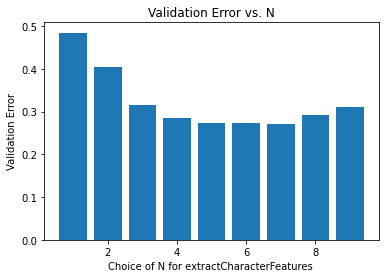

In [51]:
import matplotlib.pyplot as plt
N = [i for i in range(1,10)]

plt.bar(N, valError)
plt.title('Validation Error vs. N')
plt.ylabel('Validation Error')
plt.xlabel('Choice of N for extractCharacterFeatures ')

plt.show()

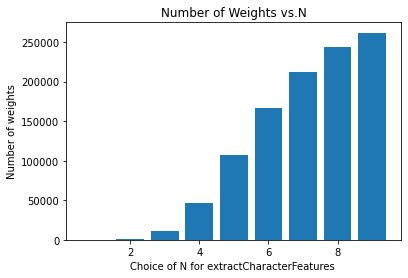

In [55]:
plt.bar(N, weights)
plt.title('Number of Weights vs.N')
plt.ylabel('Number of weights')
plt.xlabel('Choice of N for extractCharacterFeatures ')
plt.show()

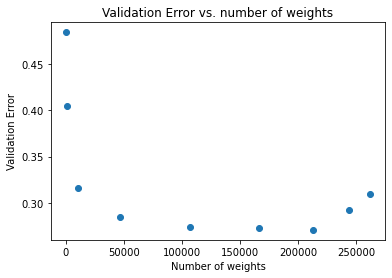

In [52]:
plt.scatter(weights, valError)
plt.title('Validation Error vs. number of weights')
plt.ylabel('Validation Error')
plt.xlabel('Number of weights')
plt.show()